In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv(r'airQualityData.csv')
ss=df.groupby('cityname')
dfx=df[['cityname','SO2','PM10','CO','O3_8']]
dfy=df[['PM25']]

In [8]:
dfx = pd.get_dummies(data=dfx, drop_first=True)
dfy2 = df["PM25"] < 40
dfy2
xc_train,xc_test,yc_train,yc_test=train_test_split(dfx,dfy2,test_size=0.6,random_state=0)
yc_train

40132    False
24163     True
29142     True
25730     True
14659     True
         ...  
21243     True
45891    False
42613     True
43567     True
68268     True
Name: PM25, Length: 28459, dtype: bool

In [9]:
from sklearn.ensemble import RandomForestClassifier
mlrfc = RandomForestClassifier(n_estimators=100, random_state=0)
mlrfc.fit(xc_train, yc_train)

RandomForestClassifier(random_state=0)

In [11]:
yrfc_pred=mlrfc.predict(xc_test)
yrfc_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
mlg=GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, random_state=0)
mlg.fit(xc_train,yc_train)

GradientBoostingClassifier(n_estimators=20, random_state=0)

In [13]:
ygrad_pred = mlg.predict(xc_test)
ygrad_pred

array([ True,  True,  True, ..., False,  True,  True])

In [17]:
from sklearn.neural_network import MLPClassifier
bra = MLPClassifier(hidden_layer_sizes=(10,8), random_state=0)
bra.fit(xc_train,yc_train)

MLPClassifier(hidden_layer_sizes=(10, 8), random_state=0)

In [18]:
ynn_pred=bra.predict(xc_test)
ynn_pred

array([ True,  True,  True, ..., False,  True,  True])

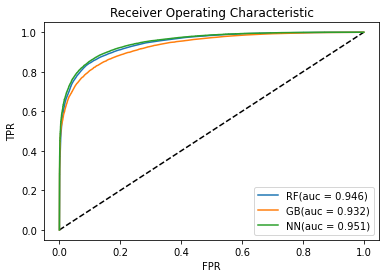

In [30]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob1 = mlrfc.predict_proba(xc_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(yc_test, y_pred_prob1)
aucrf=auc(fpr1 , tpr1)
y_pred_prob2 = mlg.predict_proba(xc_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(yc_test, y_pred_prob2)
aucgb=auc(fpr2 , tpr2)

y_pred_prob3 = bra.predict_proba(xc_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(yc_test, y_pred_prob3)
aucnn=auc(fpr3 , tpr3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RF(auc = %0.3f)" %aucrf)
plt.plot(fpr2, tpr2, label= "GB(auc = %0.3f)" %aucgb)
plt.plot(fpr3, tpr3, label= "NN(auc = %0.3f)" %aucnn)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

          classifier     score
0      Random Forest  0.875448
1  Gradient Boosting  0.856802
2     Neural Network  0.882991


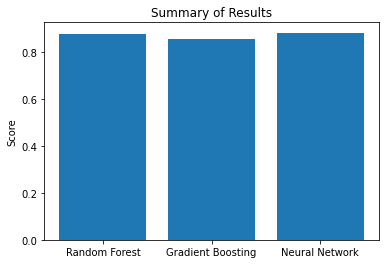

In [34]:
from sklearn.metrics import accuracy_score
rfs = accuracy_score(yc_test, yrfc_pred)
gbs = accuracy_score(yc_test, ygrad_pred)
nns = accuracy_score(yc_test, ynn_pred)
scores = [rfs, gbs, nns]
labels = ["Random Forest", "Gradient Boosting", "Neural Network"]
score_df = pd.DataFrame({"classifier":labels, "score": scores})
plt.bar(np.arange(len(labels)), scores, tick_label=labels)
plt.ylabel('Score')
plt.title('Summary of Results')
print(score_df)
plt.show()